

# Exploring Trends in Australian Census Data

---

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: Anay Joshi
- Name 2: Wong Jun Xiang Joseph
- Name 3: Paransh Patel
- Date:



Remove `_template` from your filename for submission.

<hr>


# Report

### Aim

This assignment aims to investigate the changes in marital status patterns across different age and sex groups in Australia from 1996 to 2021 through ABS Census data. In addition to the exploration of marital trends across various age groups, we will be comparing and contrasting the disparities between males and females and discuss its evolution over the 25 years. Furthermore, in other instances we may look at the data from a higher level looking at people in general rather than specific genders. Through analysing and presenting this data effectively, we are able to seek valuable insights into the evolving landscape of marital statuses within Australia. Studying marital status over different ages over time years is essential for gaining insights into the demographic, social, economic, and cultural factors that shape our societies. This information can provide meaningful insights about our population and its changes over time.

### Hypothesis

Our hypothesis states that Australia's distribution of registered marital statuses across various ages and genders has undergone intricate and meaningful transformations over the last 25 years. Firstly, we anticipate that the proportion of individuals in the married category has declined over time, reflecting evolving societal values around marriage. Secondly, we expect an increase in singles over time, suggesting a shift in lifestyle choices and societal norms. We also hope to see an increase in divorces over all age categories, reflecting the current societal belief that 50% of marriages end in divorce. Additionally, our hypothesis anticipates gender\-specific variations in these trends, shedding light on the gender factors in shaping marital decisions. Looking more into gender\-specific statistics, we expect the proportion of single males to be similar to that of females. When it comes to married proportions, we expect the proportion of married females to be more significant than males, which follows our prediction that there are more single males. Looking into age\-specific statistics, we expect the mean age of married people to lie in the late 30s to mid\-20s. We also hope to observe the mean age for marriage to be at older ages over time and, conversely, for divorce to be at younger ages over time (i.e., people are getting married later and divorced earlier). We predict this again due to societal values shifting and people's desire to pursue a career and other hobbies rather than a relationship. We will test these hypotheses by various means, using mean, mode, and median and, more importantly, data visualisation to observe and communicate trends we discover.



In [3]:
file_2021 = '2021Census_G05_AUS_AUS.csv'
file_2016 = '2016Census_G05_AUS.csv'
file_2011 = '2011Census_B05_AUST_short.csv'
file_2006 = '2006_data.csv'
file_2001 = '2001_data.csv'
file_1996 = '1996_data.csv'
DATA_LIST = [file_2021,file_2016,file_2011,file_2006,file_2001,file_1996]
POPULATION_LIST = [] # will store the total no. people who took part in the census for each year (same order as DATA_LIST)

### Data

##### Data Source

The raw data from 2021, 2016 and 2011 takes a significantly different form to the earlier years. This because the Australian Bureau of Statistics (ABS) has discontinued DataPacks for earlier years. Moreover, the data pertains to **all of Australia** rather than just a particular city or region. The data for the 2021, 2016 and 2011 census can be found here:
https://www.abs.gov.au/census/find-census-data/datapacks

To select the year, click the drop down menu to select and download the data for all of Australia. the data pertaining to marital status must be gathered. After having done this, the metadata outlies which table contains our `csv` file. It is G05 for 2021 and 2016 and B05 for 2011.

For data from 2006, 2001 and 1996, DataPacks are not available so the raw data was sourced from Basic Community Profiles, the data for these older years can be found here:
https://www.abs.gov.au/census/find-census-data/search-by-area

Once again select the drop down menu and find the relevant years and select the region as all of Australia. Download the 'Basic Community Profiles' for all the relevant years. The image below shows the layout of the data in these Basic Community Profiles (e.g is from 2006).

<div style="max-width:50%">
  <img src=".Australian_Trends.ipynb.upload/paste-0.5317331536794683" style="max-width:90%" />
</div>

##### What is the data about?

The data shows the number of people from multiple age ranges ranging from age 15 to 85 or over (or 90 or over for the 1996 dataset) who have a particular marital status **in Australia**. For example, if the age range was 15-19 and the status was "Married" the data would tell us the number of occurrences of married people between 15-19 years of age in Australia. It does *not* tell us when people first marry, rather the number of people who *are* married. Furthermore, the data splits this into 3 categories based on sex. Male, Female and Persons. Persons does not refer to a particular sex but rather is just a summation of the data for males and females. In some cases it gives a better overview of population as a whole rather than looking at the data sex specifically. The marital statuses outlined in the dataset are: "Married", "Separated", "Divorced", "Widowed" and "Never married".  In this analysis the marital status of "Widowed" will not be considered.

##### Raw data

The raw data from each of the 3 files in 2021, 2016 and 2011 take the following form:

```
AUS_CODE_2021,M_15_19_yr_Married,M_15_19_yr_Separated,M_15_19_yr_Divorced,M_15_19_yr_Widowed,M_15_19_yr_Never_married,...\n
AUS,1030,201,166,204,747727,749330,19037,1235,591,393,785566,806829,514158,23911,25601,1340,1226219...
```

The raw data consists of 2 lines (separated by a `\n` character). The first line of data contains the categories, i.e., the age ranges, sex and marital statuses. The second contains the frequency/number of occurrences in that category. The values in the top line all pair up one to one with the bottom line. For example, `M_15_19_yr_Married` has 1030 occurrences out of the total number of people who participated in the census. 

The data from 2006, 2001 and 1996 is less consistent with its format and less conducive to be used for data analysis purposes. However since it is the only available data from older years, particular emphasis has been made to format it correctly in a way that it can be consistently and repeatedly used without recurring errors. The data comes from 'Basic Community Profiles' and not 'DataPacks.' Its use is primarily to act as a summary. The data was first exported as a `csv` then cleaned using python. The raw data contains additional rows which are not needed hence they were first cropped out (done using python). The data remaining was as follows (the data shown is the 2006 data exported from Excel to csv, refer to the image above to see what the Excel spreadsheet looked like):

```
,Married(a),Separated,Divorced,Widowed,Never married,Total,,,,,,,,,,
,MALES,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,
15-19 years,"1,772",407,544,297,"692,779","695,799",,,,,,,,,,
20-24 years,"28,385","1,705","1,054",430,"650,082","681,656",,,,,,,,,,
25-34 years,"483,213","23,825","29,556","1,287","783,176","1,321,057",,,,,,,,,,
35-44 years,"879,627","55,379","116,897","4,008","381,334","1,437,245",,,,,,,,,,
45-54 years,"911,200","66,048","178,089","11,036","193,708","1,360,081",,,,,,,,,,
55-64 years,"794,367","46,136","147,917","22,887","84,826","1,096,133",,,,,,,,,,
65-74 years,"501,072","21,587","65,566","39,523","40,695","668,443",,,,,,,,,,
75-84 years,"289,456","8,946","23,804","67,473","22,781","412,460",,,,,,,,,,
85 years and over,"55,290","1,567","3,448","39,041","5,699","105,045",,,,,,,,,,
,,,,,,,,,,,,,,,,
Total,"3,944,382","225,600","566,875","185,982","2,855,080","7,777,919",,,,,,,,,,
...
```

This is data for males (in 2006), however similar blocks were present after this for females and persons. Data from these blocks was extracted and stored in an identical format as the data from more recent years (this was in an effort to streamline the data analysis process). The data from 2001 and 1996 were different in format to the data from 2006. The data from 2001 and 1996 looked as follows (example of 2001, but 1996 looks similar):

```
,Married,,,Separated,,,Divorced,,,Widowed,,,Never married,,,Total,,
,Males   ,Females,,Males,Females,,Males,Females,,Males,Females,,Males,Females,,Males,Females,Persons
,,,,,,,,,,,,,,,,,,
15-19 years,"2,043","4,679",,339,442,,355,369,,259,699,,"674,517","641,562",,"677,513","647,751","1,325,264"
20-24 years,"34,216","71,388",,"2,362","5,895",,972,"2,198",,308,543,,"591,461","531,739",,"629,319","611,763","1,241,082"
25-29 years,"186,721","267,371",,"11,682","21,795",,"9,228","17,689",,470,"1,295",,"446,355","356,351",,"654,456","664,501","1,318,957"
30-34 years,"351,046","420,058",,"23,595","35,839",,"30,449","46,753",,898,"2,891",,"282,061","210,641",,"688,049","716,182","1,404,231"
35-39 
...
```

Here the data was not in blocks but instead one row had all the data needed for a particular age group. Once again data was extracted and stored in an identical format as the data from more recent years in an effort to streamline the data analysis process. One point to note was that the years over which the data spanned was more specific for the older data (in increments of 5, rather than 10 for more recent years). Moreover in 1996 the data went as high as ages 90+, while all other years only went as high as 85+.

It is important to note that the raw data from 1996, 2001 and 2006 contained some other information above and below which was not of importance, an example has been shown here from the 2006 dataset.

```
﻿AUSTRALIAN BUREAU OF STATISTICS  2006 Census of Population and Housing,,,,,,List of tables,,,,,,,,,,
Australia (0) 7759538.2 sq. Kms,,,,,,Concepts and Definitions,,,,,,,,,,
,,,,,,Census Dictionary,,,,,,,,,,
B05 REGISTERED MARITAL STATUS BY AGE BY SEX,,,,,,Census Data Quality Statement,,,,,,,,,,
Count of persons aged 15 years and over ,,,,,,© Commonwealth of Australia 2007,,,,,,,,,,
Based on place of usual residence,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,
```

During the data cleaning process, all this was cropped out with the aid of the `csv` import from python.



### Data Cleaning

Firstly, the `read`-type functions reads these files, categorises them into age\_category and frequency values, and extracts categories \(demographic information\) and their corresponding numeric data. Furthermore, additional data preparation is conducted for clarity and consistency. It converts all category names to uppercase for consistency and substitutes terms like "NEVER\_MARRIED" to "SINGLE" for clarity and interpretability. The output comprises organized lists, 'categories' and 'numbers', housing the refined data. This meticulous refinement process is necessary for uniformity and reliability, ensuring the dataset's readiness for analytical endeavours.


In [4]:
# Read 2021, 2016 and 2011 data
def read_data_2021_2016_2011 (file):
    categories = []
    numbers = []
    with open(file,'r') as file_A:
        splitted_file = file_A.read().split("\n")
        list_of_cats = splitted_file[0].split(',')[1:]
        list_of_nums = splitted_file[1].split(',')[1:]
        # Iterate through the index of total no. of cateories (same as total no. of freq)
        for i in range(len(list_of_cats)):
            list_of_cats[i] = list_of_cats[i].upper()
            if "TOT" in list_of_cats[i]:
                continue # Skip past any rows about totals
            if "NEVER_MARRIED" in list_of_cats[i]:
                # Make the data more interpretable "Never Married" -> "Single"
                list_of_cats[i] = list_of_cats[i].replace("NEVER_MARRIED","SINGLE")
             
            categories.append(list_of_cats[i])
            numbers.append(int(list_of_nums[i]))
    return list(zip(categories,numbers)), int(list_of_nums[-1])

import csv

def read_data_2006(filename):
    needed_data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            # Keep only relevant rows of data (Note: total is kept here so that the population can be extracted later)
            if ('years' in row[0] or 'Total' in row[0]):
                needed_data.append(row[:7])
    return needed_data[1:]


def extract_needed_info_2006(data):
    output = []
    genders = ["M","F","P"]
    statuses = ["MARRIED","SEPARATED","DIVORCED","WIDOWED","SINGLE"] # statuses appear in the order in the raw rata
    s = 0
    e = 10 # Difference between 's' and 'e' is 10 - as 10 is the size of each block of data
    # Iterate through the genders M,F,P as they appear in the 2006 csv file.
    for sex in genders:
        for data_for_each_sex in data[s:e-1]: # 'e-1' is so the row related to totals is not included
            if data_for_each_sex[0] == "85 years and over":
                age_range = "85OV_YR"
            else:
                age_range = data_for_each_sex[0][0:2]+"_"+data_for_each_sex[0][3:5]+"_YR"
            for i,freq in enumerate(data_for_each_sex[1:-1]):
                output.append((sex+"_"+age_range+"_"+statuses[i],int(freq.replace(",","")))) # Format data in the same way as recent years
        if sex == "P":
            POPULATION_LIST.append(int(data[e-1][-1].replace(",",""))) # Extract and store the total population
        s+=10
        e+=10 # Move to the next block
    return output


def read_data_1996_2001(filename):
    needed_data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            if ('years' in row[0] or 'Total' in row[0]):
                needed_data.append(row)
    return needed_data[1:]


def extract_needed_info_1996_2001(data):
    output = []
    statuses = ["MARRIED","SEPARATED","DIVORCED","WIDOWED","SINGLE"]
    total_row = [item for item in data[-1] if item != '']
    POPULATION_LIST.append(int(total_row[-1].replace(",","")))
    for year_data in data[:-1]:
        year_list = [item for item in year_data if item != ''] # Cleaned to remove empty strings
        if year_list[0] == '85-89 years':
                age_range = "85_89_YR"
        elif '90' in year_list[0]:
                age_range = "90OV_YR"
        elif year_list[0] == '85 years and over':
            age_range = "85OV_YR"
        else:
            age_range = year_list[0][0:2]+"_"+year_list[0][3:5]+"_YR"
        c = 0
        s = 0
        for i,freq in enumerate(year_list[1:-3]):
            if c == 0:
                output.append(("M_"+age_range+"_"+statuses[s],int(freq.replace(",",""))))
                c+=1
            else:
                output.append(("F_"+age_range+"_"+statuses[s],int(freq.replace(",",""))))
                c = 0
                output.append(("P_"+age_range+"_"+statuses[s],int(output[-1][1])+int(output[-2][1])))
                s+=1
    return output


def read_all_files(files):
    c = 0
    FINAL_DATA = []
    for file in files:
        if c <= 2:
            FINAL_DATA.append(read_data_2021_2016_2011(file)[0])
            POPULATION_LIST.append(read_data_2021_2016_2011(file)[1])
        elif c == 3:
            FINAL_DATA.append(extract_needed_info_2006(read_data_2006(file)))
        else:
            FINAL_DATA.append(extract_needed_info_1996_2001(read_data_1996_2001(file)))
        c+=1
    return FINAL_DATA
        

The above functions all serve a purpose to read the raw data and output it in a form that can be universally used by other functions. This is ideal as we don't want to continuously change the way we extract info from the data when passing it into different functions. The function `read_data_2021_2016_2011(file)` takes in one file \(of which it must be 2021, 2016 or 2011\). It then pairs up the age categories with their frequency as a tuple. This is done to all data pairs. It also ignores any data to do with totals \(with one exception being the total number of people who took part in the census\) to keep the data as clean as possible. Moreover, it changes the wording of "Never Married" to "Single" as it makes more sense and is easier to interpret.

Cleaning the data for earlier years was not as simple, as the data was first exported from Excel spreadsheets to a CSV format, then meticulously cropped to include the actual information. Then, depending on how the data was formatted, it was iterated through and placed into lists such that the data would have the same format as the more recent years.

`read_data_2006()` and `read_data_1996_2001()` serve the purpose of cropping out preliminary information from the raw data. It extracts all the information needed but does not organise it or structure it. It merely crops the data and prepares it to be passed into the two extract\_needed\_info functions. It is this function's job to organise and structure the data to look like 2021, 2016 and 2011's data.

Since the data from 2006 was significantly different in format to 1996 and 2001, a separate function had to be made to read in that data appropriately. Once cropped, the raw data was structured in blocks, with each block pertaining to a particular gender \(M,F,P\). We started with the first block and iterated through, then moved onto the subsequent block until all 3 blocks were traversed.

The raw data from 2001 and 1996 was similar, but there were still some subtle differences. Such as the age ranges were more specific and went for older ages. Nonetheless, we had planned to augment \(spread\) the data out over the age ranges. Hence, this was not a concern. The data for these 2 years was structured in one block with each row having data for a particular age. We looped through each row, extracting the ages and keeping track of the columns we were analysing. The columns were structured in an order as follows: `Married-M, Married-F, Separated-M, Separated-F, Divorced-M, Divorced-F...,` with empty columns separating them. We kept track of the columns and ignored the last 3 as they had data about totals.

Overall the data was collated and organised in the following structure such that each row looked as follows:

```
({sex M/F/P}_{start age}_{end_age}_{marital status} , {freq/number of occurences})
```

Finally, the `read_all_files()` function takes in a list of every file name. This has been created and named `DATALIST` and is stored as a global variable. It simply calls all the other `read` and `extract` functions to create a list of lists where each sub\-list contains organised and structured data for a particular year. The lists are ordered from most recent \(at index 0\) to oldest \(at index 5\).
I.e., \[0 = 2021, 1 = 2016, 2 = 2011, 3 = 2006, 4 = 2001, 5 = 1996\]

It is important to note while the actual data needed excluded any rows regarding the Total, we did need the total number of people who took part in the census \(which will act as our total population to base proportions on\). This was not stored alongside the cleaned data but rather separately in the `POPULATION_LIST` list declared at the beginning of the file. During the reading of the data, it was imperative we did not remove that information, just simply ignore it until we needed to store it. The method in which this population statistic is extracted and copied into the `POPULATION_LIST` list varies depending on the dataset. For the data from 2021, 2016 and 2011, the last row of the dataset was always the total population statistic. Hence, it returned alongside the data as a tuple i.e.,

```
return list(zip(categories,numbers)), int(list_of_nums[-1])
```

The population statistic was then copied into the  `POPULATION_LIST` list during the `read_all_files()` function. The same cannot be said for the data from the Basic Community Profiles. The population statistic was extracted during the final stages of iteration through the data. For example, in 2006, the following line of code was present.

```
if sex == "P":
            POPULATION_LIST.append(int(data[e-1][-1].replace(",","")))
```

In the final iteration of `sexes` in the 2006 data \(which was related to persons\), it finds the population statistic and stores it.

Similarly, the following code finds the last row of data \(outputted by the `read_data_1996_2001` function\), which contains information about the totals and extracts the final total population value.

```
total_row = [item for item in data[-1] if item != '']
POPULATION_LIST.append(int(total_row[-1].replace(",","")))
```



In [5]:
def spread_data_row(age_cat, num):
    # Extract age category information.
    status = age_cat.split('_')[-1]
    sex = age_cat.split('_')[0]
    
    # Determine age range based on the category.
    if "85OV" in age_cat:
        start, end = 85, 100
    elif "90OV" in age_cat:
        start, end = 90, 100
    else:
        start, end = age_cat[2:4], age_cat[5:7]
    start, end = int(start), int(end)
    
    # Calculate the base freq for each spreaded age
    num_years = end - start + 1
    base_value = num // num_years
    remainder = num % num_years
    
    # Generate age categories within the range.
    age_list = [f'{sex}_{n}_{status}' for n in range(start, end + 1)]
    
    # Distribute frequency across age brackets.
    distribution = [base_value] * num_years
    
    for i in range(remainder):
        distribution[i] += 1
    
    return list(zip(age_list, distribution))

def spread_data():
    all_yrs_data = read_all_files(DATA_LIST)
    FINAL_SPREADED_DATA = []
    each_yr_data = []
    
    for data in all_yrs_data:
        for cat, freq in data:
            # For each row in the DATA_LIST spread its row
            for tup in spread_data_row(cat, freq):
                each_yr_data.append(tup)
        
        FINAL_SPREADED_DATA.append(each_yr_data)
        each_yr_data = []
    
    return FINAL_SPREADED_DATA

                

The function `spread_data()` is critical in data analysis by enabling the constant spread of numerical values across designated age categories. This distribution process is necessary as it is a prerequisite for calculating accurate means and other statistics within a particular age group. 

Firstly, the function starts by extracting the marital status \(e.g., "SINGLE," "MARRIED"\) and gender \(e.g., "M", "F", "P"\) from the given age ranges in `age_cat`. It then determines the start and end ages based on the provided age\_cat or assigns default values of 85 and 100 if the age\_category is over 85 \("85OV"\) or 90 to 100 if its "90OV" for the 1996 dataset.

Secondly, the function `spread_data()` calls the `spread_data_row()` function, which calculates the number of years within the age range and distributes the numeric value num evenly across these years. The function `spread_data()` makes repeated calls to `spread_data_row()` to ensure that num is spread evenly across the age ranges for every `(age_cat,num)` pair. 

This results in a meticulously structured list of age categories, each with an equal distribution, ensuring data uniformity within age cohorts. This function is essential in computing the means and conducting detailed statistical analyses within specific age groups, enhancing the comprehensiveness of data\-driven insights.

However, while this assumption simplifies the data distribution process, it introduces potential limitations. The primary cons of this assumption include the risk of oversimplification in scenarios where age distributions are not equal, potentially leading to inaccuracies in mean calculations and other statistical analyses. For example, data spread over the age range 15\_19 will contain \(roughly\) the same number of occurrences per age. This, in reality, will likely not be the case as specific ages may have higher occurrences compared to other ages. Therefore, when applying this function to real\-world data analysis tasks, the assumption of uniform age distribution \(over an age range\) should be considered and evaluated based on the specific dataset and research objectives.



In [6]:
def get_marital_status_data_M_F_P(status, sex, spread):
    status = status.upper()
    sex = sex.upper()
    married_M_F_P = []
    # Input sanitation
    if status not in ["MARRIED", "DIVORCED", "SEPARATED", "WIDOWED", "SINGLE"
                      ] or sex not in ["M", "F", "P"]:
        raise ValueError("That category or sex does not exist in the data!")
    if spread:
        all_yrs_data = spread_data()
    else:
        all_yrs_data = read_all_files(DATA_LIST)
    for data in all_yrs_data:
        relevant_data = []
        for cat, freq in data:
            # Keep only the rows which have the informaton requested
            if status in cat and sex + '_' in cat:
                relevant_data.append((cat, freq))
        # Append the selected rows into a new list with only the relevant data
        married_M_F_P.append(relevant_data)
    return married_M_F_P

The function `get_marital_status_data_M_F_P(status, sex, spread)` \(shown above\) plays a critical role in data refinement and analysis. This function facilitates the extraction and structuring of data to the predefined criteria around marital status \(e.g., "MARRIED," "SINGLE"\) and sex \(e.g., "M" for male, "F" for female, "P" for persons\). Furthermore, it does not assume the existence of specific status or sex categories in the data. Instead, it verifies the validity of each provided input to safeguard data integrity. This validation mechanism is vital in data cleaning and data preparation, ensuring that only relevant and accurate categories are considered. Furthermore, this function streamlines the process of filtering insights from marital status demographics. Therefore, concentrating on precise categories simplifies the analytical process, enables researchers to focus on specific insights, and increases the precision of their findings in a professional and systematic manner.

The function takes in 3 parameters, namely the `status`, `sex` and whether the outputted data should be spread or not. Depending on the inputs it will produce a subset from the total dataset specifically with the information requested for each of the 6 year's census data. It will iterate through all the 6 year's of data and find only the rows which contain the `sex` and `status` specified. It loops over each year, extracts the rows then places all the relevant rows into the `relevant_data` list. That is repeated for every year, thus producing an output which is a list of lists, where each sub-list relates to data for a particular year. The lists are ordered from most recent (at index 0) to oldest (at index 5).
I.e., [0 = 2021, 1 = 2016, 2 = 2011, 3 = 2006, 4 = 2001, 5 = 1996]

E.g. the following code snippet produces the first 10 rows of data which has been spread for the male sex for the marital status of "Single" in 2016.



In [7]:
# The first [0] specifies the year as 2021, indexes can go up to [5] for the year 1996
get_marital_status_data_M_F_P("Single","M",spread=True)[1][:10]

[('M_15_SINGLE', 144928),
 ('M_16_SINGLE', 144928),
 ('M_17_SINGLE', 144928),
 ('M_18_SINGLE', 144928),
 ('M_19_SINGLE', 144927),
 ('M_20_SINGLE', 153042),
 ('M_21_SINGLE', 153042),
 ('M_22_SINGLE', 153042),
 ('M_23_SINGLE', 153042),
 ('M_24_SINGLE', 153041)]

In [8]:
#Mean Function

def mean_of_data(data):
    total_sum = 0
    n = 0
    for cat, num in data:
        age = int(cat.split('_')[1])
        n += num
        # Keep track of the total sum of occurences
        total_sum += age * num
        # Keep track of the sum of all spread age values
        
    mean = total_sum / n
    return round(mean, 2)

The `mean_of_data(data)` function is vital in our data analysis as it computes the mean ages within the dataset. This is an important metric for identifying trends in marital statuses. Finding the mean provides essential insights into the central age tendency, enabling the identification of age\-related patterns and trends. 

\begin{equation}
\text{Mean} = \frac{\text{Total Sum of Ages}}{\text{Sum of total Number of Occurrences for each age}}
\end{equation}

Through the comparison of the mean ages across different years or different sex and marital status, we can observe changes in marital behaviour, such as delayed marriages. Additionally,  analysis of the means highlights generational shifts in marriage patterns, assisting in our understanding of evolving trends. Therefore, the function's ability to provide a quantifiable metric for comparison across various demographics enhances our capability to recognise and interpret variations, ultimately facilitating trend identification in the data.

The `mean_of_data(data)` function takes a single parameter of which it will calculate the mean for. The data it takes in will be directly in the form `get_marital_status_data_M_F_P()` outputs, thus allowing ease of use.
For example, the following code calculates the mean age for married males in 2021.

*Note, the data the `mean_of_data()` takes in data **which is already** spread, hence the `spread = True`*



In [9]:
mean_of_data(get_marital_status_data_M_F_P("Married","M",spread = True)[0])

54.25

In [10]:
# Mode Function

def mode(clean_data):

    #Splitting the age and frequency into 2 list
    age_cat = []
    num_list = []
    for age, num in clean_data:
        num_list.append(num)
        age_range = age.split('_')
        for i in age_range:
            if i.isdigit():
                age_cat.append(int(i))

    #sorting the data from cleaned_data in ascending order
    sorted_data = sorted(list(zip(age_cat, num_list)), key=lambda x: x[0])

    #finding the average mode age
    max_num = 0
    mode_ages = []
    for age, num in sorted_data:
        if num > max_num:
            max_num = num
            mode_ages = [age]
        elif num == max_num:
            mode_ages.append(age)
    average_mode_age = sum(mode_ages) / len(mode_ages)
    return average_mode_age

The `mode(clean_data`\) function is an essential component of our data analysis toolkit, contributing to our hypothesis and overarching aim analysis. This function finds the mode of a specific demographic within our meticulously cleaned dataset \(derived from the `get_marital_status_data_M_F_P(status,sex,spread)` function\). Firstly, `mode(clean_data)` extracts and segregates the age and frequency data into distinct lists and sorts the lists in ascending order based on age. Subsequently, it identifies the age category/ categories with the highest frequency, showing prominent demographic trends. The benefits of this function are significant as it identifies dominating age groups, which helps with our in\-depth trend analysis and hypothesis testing. Although the function has some drawbacks, such as averaging the modes in instances with more than 1 mode, it is still a crucial tool for understanding age\-related trends in marital statuses and increases the depth of our dataset's insights.


In [11]:
# Median Function

def median(clean_data):
    #Splitting the age and frequency into 2 list
    age_cat = []
    num_list = []
    for age, num in clean_data:
        num_list.append(num)
        age_range = age.split('_')
        for i in age_range:
            if i.isdigit():
                age_cat.append(int(i))

    #sorting the data from cleaned_data in ascending order
    sorted_data = sorted(list(zip(age_cat, num_list)), key=lambda x: x[0])

    #Making a full list where there is 1 age cat for each occurence in the frequency
    full_age_cat = []
    for index in range(len(sorted_data)):
        full_age_cat.extend([sorted_data[index][0]] * sorted_data[index][1])

    #Finding the median position
    median_position = sum(num_list) / 2

    #If the median position is between 2 numbers find both positions
    median_position_list = []
    if str(median_position).isdecimal():
        median_position_list.append(median_position)

    else:
        median_position_list.append(sum(num_list) // 2)
        median_position_list.append((sum(num_list) // 2) + 1)

    #Finding the median age
    median_age_list = []
    for item in median_position_list:
        median_age_list.append(full_age_cat[item])
    median_age = sum(median_age_list) / len(median_age_list)
    return round(median_age, 2)

The `median(clean_data)` function is a critical tool in our data analysis toolkit. Firstly, the function organises and sorts the age and frequency data \(derived from the `get_marital_status_data_M_F_P(status,sex,spread)` function\) without assuming sequential order, safeguarding and enhancing the accuracy in data handling. Secondly, the function finds the median position. The function then constructs a list with age categories repeated according to their frequencies and calculates the median age based on the calculated median position. By offering a statistical metric that is less susceptible to outliers than the mean, this function enhances the accuracy of the analysis. 

The `median (clean_data)` function assists in attaining research objectives stated in the hypothesis and aim. It is essential for identifying patterns in Australian marital statuses across various age groups and genders. Calculating the dataset's median age gives age categories a central point of reference and makes it possible to spot changes in marital status distributions. For example, changes in the median age can signify changes in the specific marital statuses within different years. Additionally, it could discover gender\-specific patterns in marital choices by applying the function individually to male and female datasets, further aligning with the research goals.


### Data Analysis/Interpretation

In [12]:
def convert_freq_to_proportions(DATA):
    
    #Creating lists to store the proportions for each year and the overall proportions
    i = 0
    FINAL_PROP_DATA = []
    each_year_prop_data = []
    
    #Calculating the proportions and putting into a list for each year
    for sub_list in DATA:
        for cat, freq in sub_list:
            freq = freq / POPULATION_LIST[i]
            each_year_prop_data.append((cat, freq))
            
        #Compling each proportion list for each year into a master list    
        FINAL_PROP_DATA.append(each_year_prop_data)
        each_year_prop_data = []
        i += 1
    return FINAL_PROP_DATA

The `convert_freq_to_proportions(DATA)` function is an aspect of the data analysis strategy that enhances the meaningfulness of the findings. It effectively standardises the data by methodically converting absolute frequencies of marital status categories into proportions relative to the total population that participated in the census that year. The function helps us to conduct more insightful comparisons between various years with different population sizes by turning frequencies into proportions. As this analysis accounts for the population variations, it allows us to draw precise conclusions on the evolution of marital patterns. Therefore, the use of the `convert_freq_to_proportions(DATA)` function increases the precision of the data analysis, making the research findings more relevant to the research objectives. 

\begin{equation}
\text{Proportion} = \frac{\text{Freq of people in that category}}{\text{Total number of people who took part in the census}}
\end{equation}



In [13]:
import matplotlib.pyplot as plt
import numpy as np


def plot_line_graph_for_MS(status, sex):

    DATA = get_marital_status_data_M_F_P(status, sex, spread=True)
    DATA = convert_freq_to_proportions(DATA)

    # Extract age ranges and frequencies for each year
    age_ranges = [entry[0] for entry in DATA[0]]
    age_ranges_labels = [age_range[2:4] for age_range in age_ranges[:-1]
                         ]  # Extract only the age range part
    age_ranges_labels.append("100")
    freq_1996 = [entry[1] for entry in DATA[5]]
    freq_2001 = [entry[1] for entry in DATA[4]]
    freq_2006 = [entry[1] for entry in DATA[3]]
    freq_2011 = [entry[1] for entry in DATA[2]]
    freq_2016 = [entry[1] for entry in DATA[1]]
    freq_2021 = [entry[1] for entry in DATA[0]]

    # Create a numpy array for x-axis positions 
    #(numy array is typically how pyplot documentation has achieved this)
    x_positions = np.arange(len(age_ranges_labels))

    plt.figure(figsize=(10, 6))

    # Plot lines for each year
    plt.plot(x_positions, freq_1996, label='1996', linewidth=2)
    plt.plot(x_positions, freq_2001, label='2001', linewidth=2)
    plt.plot(x_positions, freq_2006, label='2006', linewidth=2)
    plt.plot(x_positions, freq_2011, label='2011', linewidth=2)
    plt.plot(x_positions, freq_2016, label='2016', linewidth=2)
    plt.plot(x_positions, freq_2021, label='2021', linewidth=2)

    plt.xlabel('Age Ranges')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of people who are {status} by Age Range over time')
    # Set x-axis ticks to show every 5 age ranges
    x_tick_positions = np.arange(0, len(age_ranges_labels), 5)
    plt.xticks(x_tick_positions,
               [age_ranges_labels[i] for i in x_tick_positions])
    plt.legend()

    plt.tight_layout()
    plt.show()

The function above `plot_line_graph_for_MS()` creates lines for each of the years (based on the proportions) for a particular marital status. It then sets the x-axis increments to every 5 years (rather than every year) to make the graph more readable.

The following graphs have been plotted based on the proportion of people rather than simply the number of people. This was done so inaccurate trends were not spotted due to the increasing national population. When plotting against the proportion, it considers the overall population and gives a ratio rather than just a frequency.

We can observe several trends, notably from Married, Divorced and Single proportions for overall people.



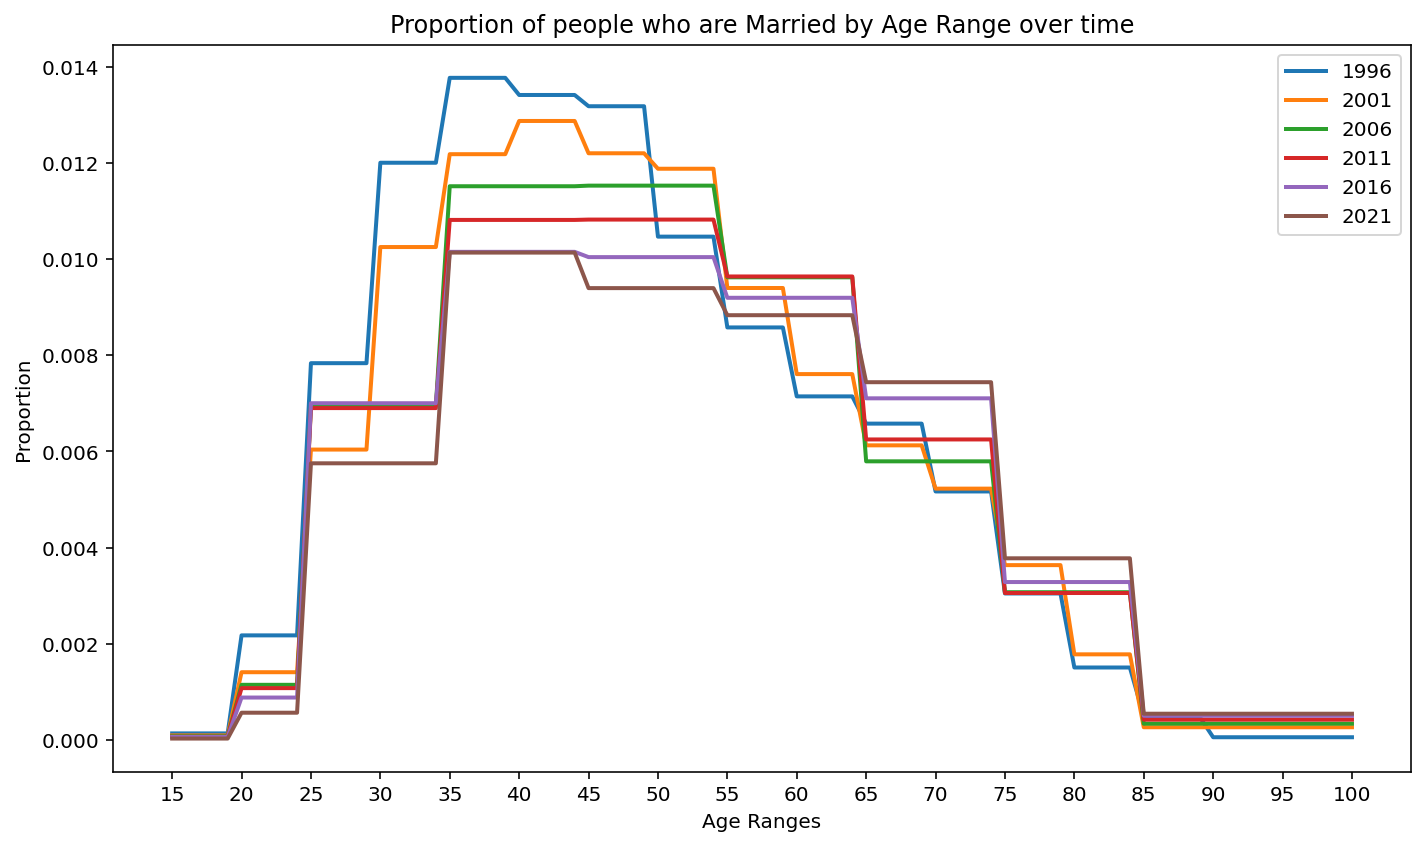

In [14]:
plot_line_graph_for_MS("Married","P")

We can see that the graph roughly follows a normal distribution \(which is skewed to the right a little\), with the mean sitting between 40\-54 \(which we will delve into later\). We can also see that a more significant proportion of those ages 65 and older are married in 2021 compared to previous years, such as 2016 and 2011. Moreover, when it comes to younger ages, we can see that as the years have gone by, the proportion of people who are married at ages 64 and younger has declined. An interesting observation can be made for the years 2021 and 2016. For younger ages, both years have the lowest proportion of married individuals. However, in the later years, we can see that they have one of the highest proportion of married individuals compared to other years. This sudden change can be due to modern people focusing on other aspects of their lives rather than getting into relationships early on in life.


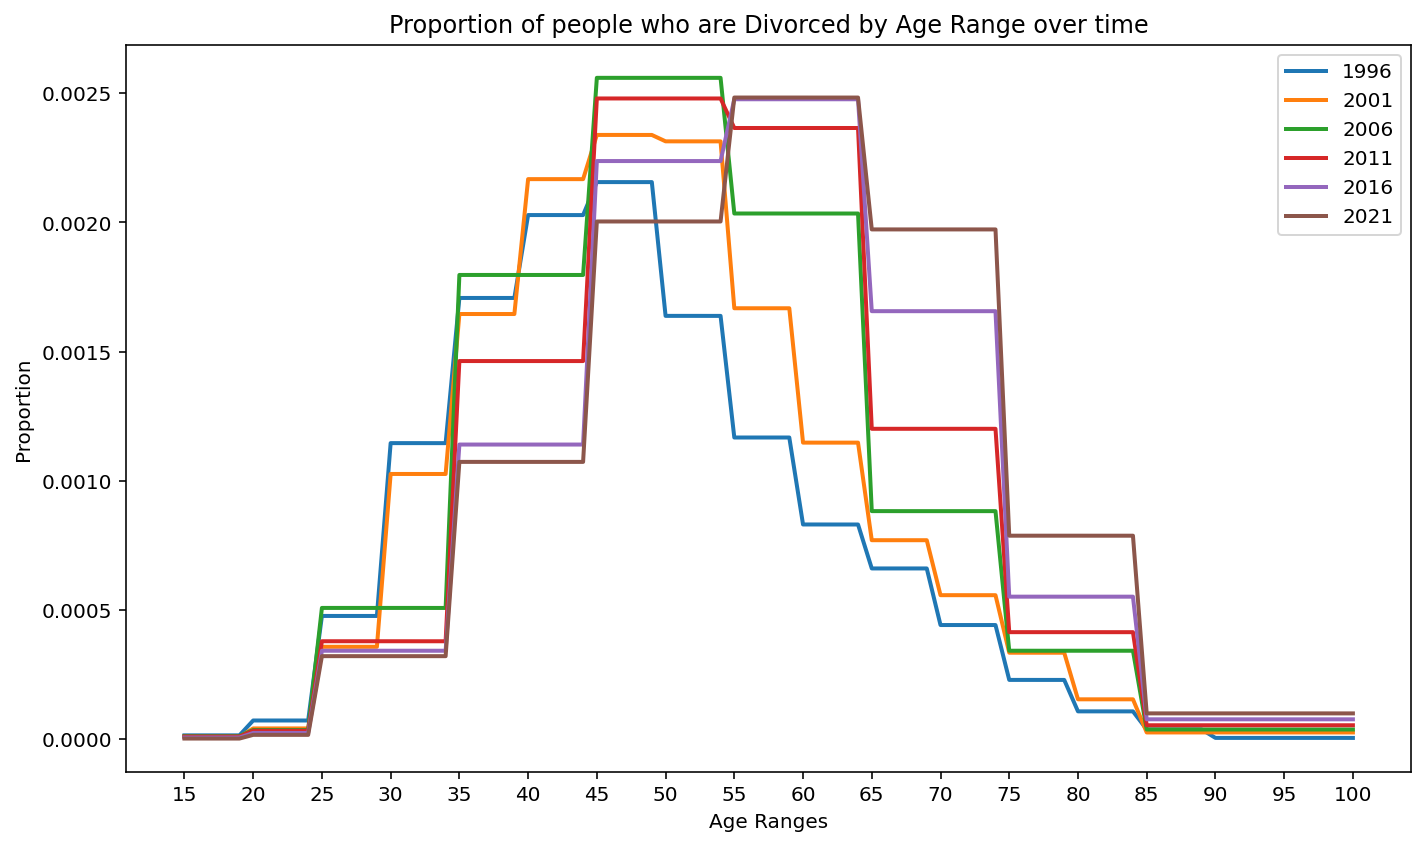

In [15]:
plot_line_graph_for_MS("Divorced","P")

After analysing the graph, we can see a notable symmetrical pattern. Within this dataset, it becomes evident that couples aged between 45 and 65 exhibit the highest divorce rates compared to other age groups. Furthermore, a noteworthy observation can be made, indicating that as the years progress, divorces within couples aged 65 and above exhibit a consistent increase, with each increase in the year category showing an increase in divorce rates. This observation underscores a notable trend. We can observe that the divorce rate is rising steadily over time. Our hypothesis states that we would expect to see an increase in divorces over all age categories, which has been proven to be true by the graph shown above.

The peak divorce rates within the 45\-54 and 55\-64 age ranges can be attributed to multifaceted factors. Life events, such as the birth of a child or children leaving the household, can profoundly influence the stability of marriages in these age brackets. Moreover, societal trends and norms play a pivotal role, potentially normalising divorce within these age groups. The acceptance of divorce as a viable option or a desire to remarry may consistently affect these individuals, particularly if their social circles and peer groups reinforce such behaviour. These combined factors contribute to the observed patterns in divorce rates across different age ranges, shedding light on the complex dynamics underlying marital stability.


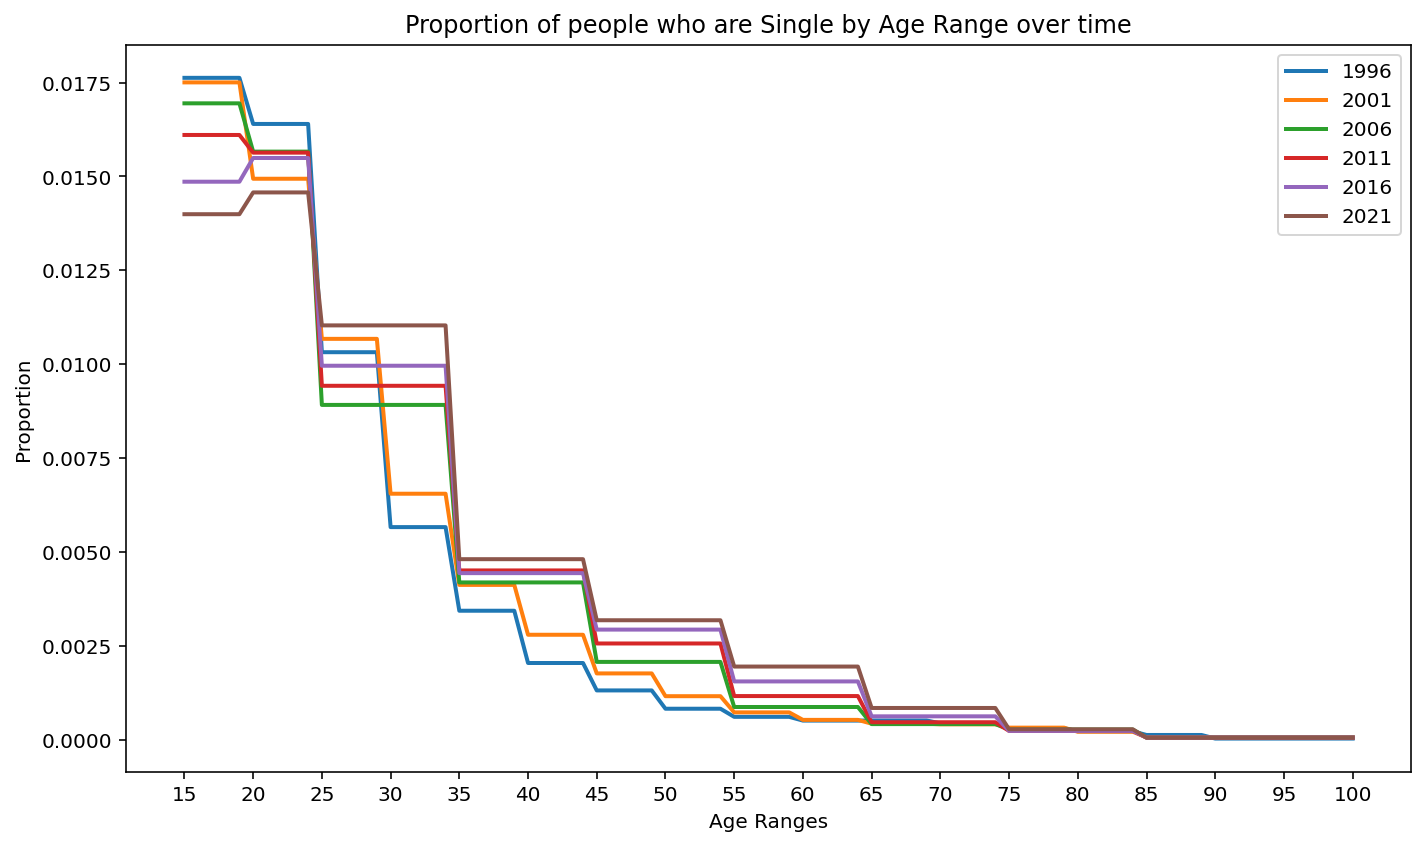

In [16]:
plot_line_graph_for_MS("Single","P")

The line graph presents a compelling and consistent downward trend in the proportion of single individuals across these age groups. Notably, this trend is skewed to the right, indicating that a higher proportion of singles is observed among younger age groups while steadily decreasing as age increases. A noteworthy observation emerges from the data for the year 2021, revealing a significant shift in the proportion of single individuals across age groups. While the 15\-24 age group exhibited the lowest prevalence of single individuals, a marked transition occurred in the subsequent age group \(24\-34\), where it surged to become the age category with the highest concentration of single individuals. Every age group after that shows that the 2021 dataset has the highest number of single individuals, then 2016, followed by 2011, 2006, 2001 and 1996 respectively. This directly related to our hypothesis which states that we would expect to see more single and de facto relationships as the years progress. This abrupt transformation can be attributed to many societal factors, including evolving norms and values. In contemporary society, individuals may place greater emphasis on educational pursuits and personal development, prioritising these pursuits over early commitments to marriage or partnerships.



In [17]:
def plot_line_graph_for_sex_against_MS(status):

    age_ranges_labels = ['1996', '2001', '2006', '2011', '2016', '2021']  # Extract only the age range part
    fem_data = get_marital_status_data_M_F_P(status, "F", spread=True)
    male_data = get_marital_status_data_M_F_P(status, "M", spread=True)
    male_female_totals = [[], []]
    for i in range(5, -1, -1):
        sum = 0
        for index, freq in male_data[i]:
            sum += freq
        male_female_totals[0].append(sum / POPULATION_LIST[i])
    for i in range(5, -1, -1):
        sum = 0
        for index, freq in fem_data[i]:
            sum += freq
        male_female_totals[1].append(sum / POPULATION_LIST[i])

    # Create a numpy array for x-axis positions
    x_positions = np.arange(6)

    plt.figure(figsize=(10, 6))

    # Plot lines for each year
    plt.plot(x_positions,
             male_female_totals[0],
             label='Male',
             linewidth=2,
             color=(41 / 255, 134 / 255, 204 / 255))
    plt.plot(x_positions,
             male_female_totals[1],
             label='Female',
             linewidth=2,
             color=(251 / 255, 163 / 255, 196 / 255))

    plt.xlabel('Years')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Males and Females who are {status} over time')
    plt.xticks(x_positions, age_ranges_labels)
    plt.legend()

    plt.tight_layout()
    plt.show()

The above function gets the male and female data for a particular marital status using `get_marital_status_data_M_F_P()` then totals it up for each year. Then the total is converted into a proportion. That is done for each year, for both males and females. Both those lines are then plotted.



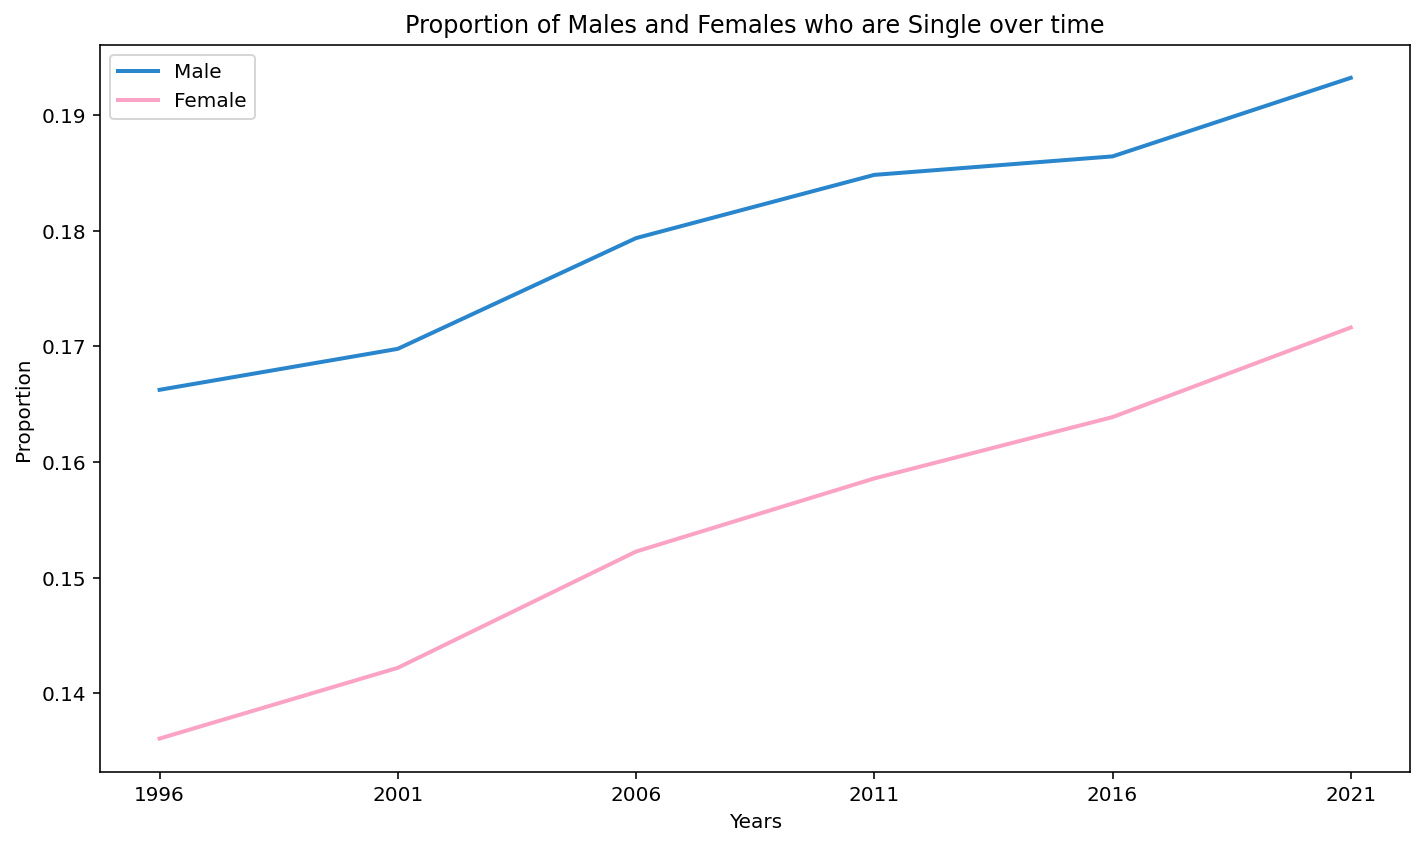

In [18]:
plot_line_graph_for_sex_against_MS("Single")

The following graph outlines the proportion of single males and females from each year \(1996\-2021\). We can see a definitive positive trend over the years. As time progresses, the proportion of single males and females increases. This aligns with our hypothesis and cements the idea that people value careers and their goals more than relationships. However, an important point to note is that males consistently have a higher proportion of singleness compared to females. This interesting finding suggests that females value relationships more than males and thus have lower proportions of single people across all ages.


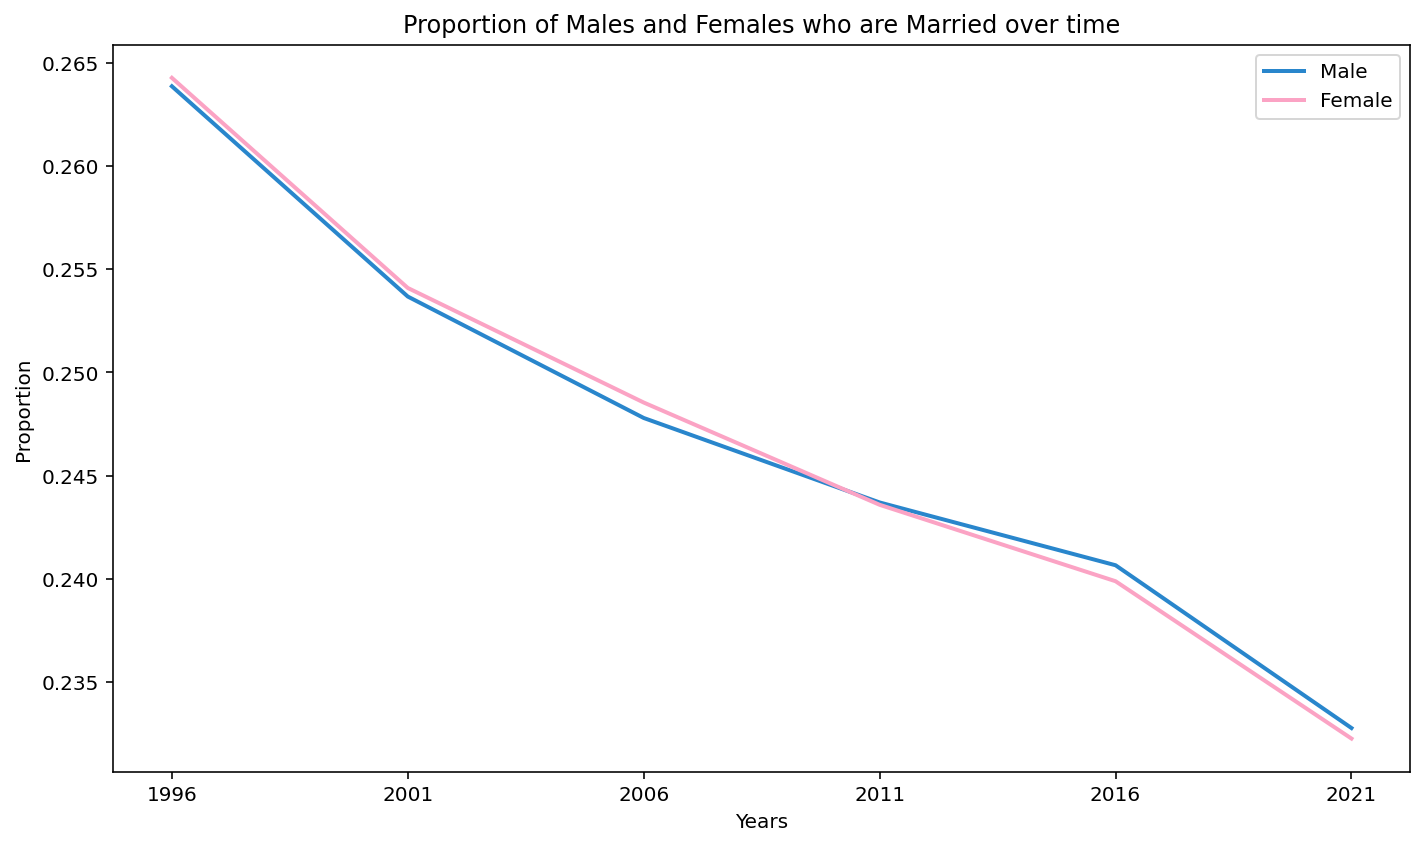

In [19]:
plot_line_graph_for_sex_against_MS("Married")

This graph depicts the \(total\) proportion of married males and females from 1996 to 2021. The data reveals that there isn't a significant difference in the proportion of single males compared to females. Contrary to our hypothesis, there was a subtle shift in marriage proportions during 2011 and onwards, with more males being married than females. However, in line with our expectations, the graph shows a consistent downward trend in marriage rates for both genders over time. This downward trend could be due to evolving cultural attitudes towards marriage being shifted towards greater acceptance of alternative lifestyles and relationship choices. Alternatively, the high divorce rates shown in the previous analysis could lead to this outcome. Experience of family or friends going through a divorce can lead individuals to be more cautious about marriage. 


### Measures of Central Tendency

In [20]:
def plot_line_graph_for_medians():
    years_labels = ['1996', '2001', '2006', '2011', '2016', '2021']
    
    status_colours = ["Green", "Red", "Blue"]
    
    for sex in ['M', 'F']:
        for i,status in enumerate(['Married', 'Divorced', 'Single']):
            median_data = []
            for year in range(5,-1,-1):
                median_data.append(median(get_marital_status_data_M_F_P(status,sex,spread = True)[year]))
            if sex == 'M':
                plt.plot(years_labels, median_data, label=f'{status}-{sex}', color = status_colours[i])
            else:
                plt.plot(years_labels, median_data, linestyle = "--", label=f'{status}-{sex}', color = status_colours[i])
            
    plt.xlabel('Year')
    plt.ylabel('Median')
    plt.title(f'Median Age by Marital Status by Sex over time')
    plt.legend()
    plt.tight_layout()
    plt.show()

The code above generates 6 lines in the data for 3 statuses and both genders for each status. It iterates over a particular sex and generates 3 lines for that sex's marital status. For each sex and marital status pair it makes a call to our `median()` function to calculate the median and append that data into a list. The ordering of data in this list is carefully ensured to match up with the output for `get_marital_status_data_M_F_P()`. This is then done again for the other sex. Lines for the same sex are distinguished by dashed and not dashed (see legend). Same marital status lines are coloured with the same colour.

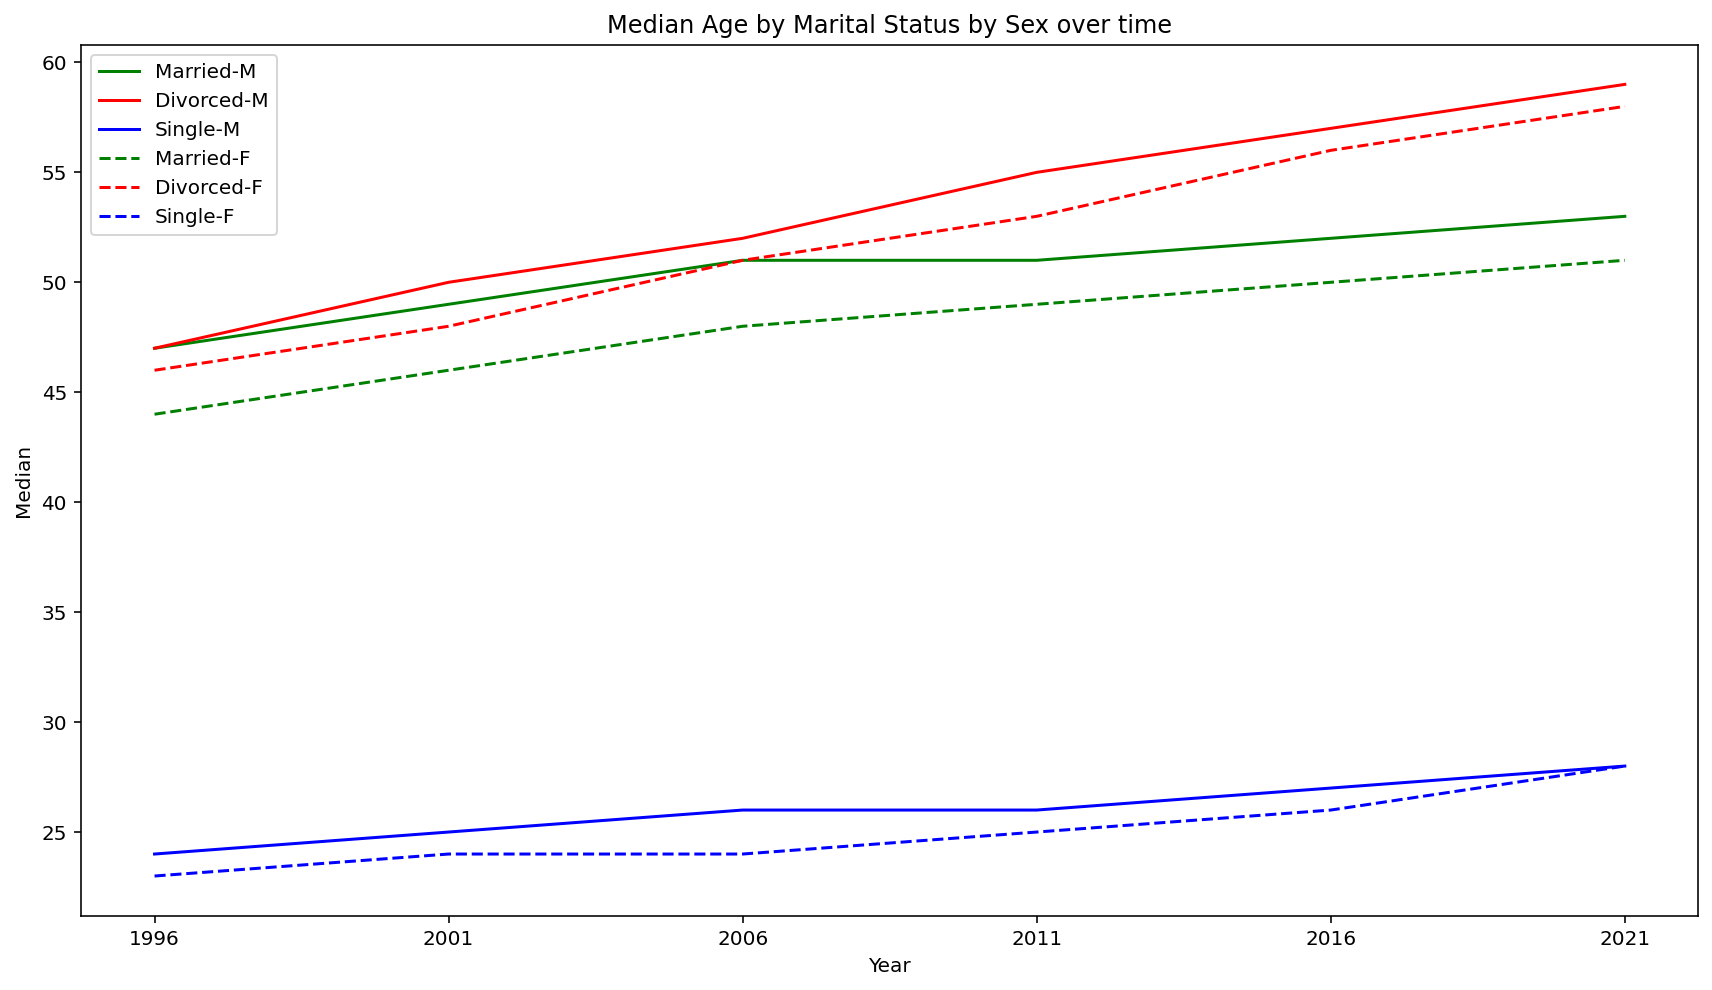

In [21]:
plot_line_graph_for_medians()

The graph shows each category having an upward trend across the years. One noticeable feature outlined by the graph is from 2006 to 2011 for all males. We can see that the median age for the single males stayed the same. The median age for married men decreased while the divorce rates increased significantly. With exception to this unusual period, the median age for all categories seems to be increasing as time progresses. The plot outlines how, in every marital status \(out of the ones displayed in the graph\) females always have a lower median age: an average lower age to marry, a lower age to divorce, and a lower age to be single. The contents of this graph should not be mistaken to suggest 'when' people are marrying, as this graph does not tell us that information. An important thing to note is that the graph shows the median age as opposed to the mean age for one primary reason, which is that the mean is affected more by outliers; hence, the median is a better measure of the "typical age" we would expect to see someone with these marital statuses. We can compare the median and means more specifically by determining their numerical value. For example, the following code shows married males' mean and median in 2021.


In [22]:
print("Mean =" , mean_of_data(get_marital_status_data_M_F_P("Married","M",spread = True)[0]))
print("Median =",  median(get_marital_status_data_M_F_P("Married","M",spread = True)[0]))

Mean = 54.25
Median = 53.0


We can see that a difference does exist, likely due to how the data is spread out. The fact that there isn't a significant difference suggests that there are probably few outliers in the dataset \(at least for 2021\), but this seems reasonable, considering the data is from a large dataset and a reputable source. Aside from mean and median, another measure of central tendency is mode. This will tell us which age for a given marital status has the most occurrences.


In [23]:
print("Mode =" , mode(get_marital_status_data_M_F_P("Married","M",spread = True)[0]))

Mode = 37.0


This makes sense from our previous plots of proportions against age for married people. The age group with the largest proportion \(in 2021\) of married people was in the range of 35\-45, which this numerical answer also suggests. The reason there would be such a significant difference between the median/mean, and the mode is likely because the graph is right\-skewed, meaning it has many more occurrences at higher ages compared to lower ages \(which gives a longer tail on the right side of the plot\). Because of the higher numbers of older age groups, the median and mean are shifted to give a more central measure, but the mode remains at the age with the highest occurrence.

In our hypothesis it was stated that we expect the mean for married people to be between "mid 20s" and "late 30s." We can test our hypothesis as follows:



In [24]:
print("Mean =" , mean_of_data(get_marital_status_data_M_F_P("Married","P",spread = True)[0]))
print("Mode =" , mode(get_marital_status_data_M_F_P("Married","P",spread = True)[0]))

Mean = 53.01
Mode = 37.5


We can see that our initial prediction \(in the hypothesis\) for the mean age of married people was largely incorrect, as the actual mean is closer to 53. In fact, our predicted mean range \(from the hypothesis\) for married people is actually the mode for that dataset, which shows a clear distinction between mean and mode and how we initially mistook the mean for the mode.


## Conclusion

In this analysis, we investigated how marital status patterns have changed across different age and sex groups in Australia from 1996 to 2021 through ABS Census data. We explored trends across other age groups for marital statuses, comparing and contrasting the differences in Male and Female statistics and how they have evolved over 25 years. Through analysing and presenting this data effectively, we outlined valuable insights into the evolving landscape of marital statuses within Australia, meeting the standards of professionalism.

##### _Assumptions and Limitations_

Although the analysis has identified unique patterns in marital statuses, it is essential to note the various assumptions made in the analysis and the limitations caused by those assumptions. Firstly, the analysis uses the function `spread(data)`, which provides a uniform distribution across the different age ranges. However, in reality, all ages are unlikely to have an equal distribution. This assumption will limit the accuracy of the mean, median and mode calculation. Furthermore, the analysis of mode and median averages the age when there is more than one mode or median. This assumption will result in inaccuracy, especially in the modes when there is a bimodal data distribution \(as seen in the graph below\). Overall, the contents of the data as age ranges rather than specific ages limit specificity and reduce precision.

<div style="max-width:50%">
  <img src=".Australian_Trends.ipynb.upload/paste-0.6997157559968874" style="max-width:70%"/>
</div>

##### *Hypotheses vs results*

*The Proportion of individuals in the married category will decline over time*

We anticipated that the proportion of individuals in the married category would decline over time, reflecting evolving societal values around marriage. The plot for the proportion of married males and females over time clearly shows a decline in proportion of BOTH males and females over time. Hence this prediction was accurate.

*As time progresses, proportion of singles will increase*

The results illustrated by the "Proportion of people who are single by age range over time" graph works to prove our hypothesis correct. As expected, the graph shows that as the years increase, the number of single individuals in Australia increases, despite the age category. We can see that 1996 had the lowest proportion of single individuals. However, as the years progressed, the proportion increased gradually. This increase could be explained by multiple factors like people placing greater emphasis on education or personal development and pushing away relationships for later stages in life. At younger ages the opposite is true, but generally for all ages above 25, our prediction is valid. This can also be seen in the plot for males and females who are single. The proportion of both males and females increases over time.

_There will be an increase in divorces over all age categories_

_"People who are divorced by age range over time_" graph shows that with each increase in the year category an increase in the divorce rates also occurs consistently. We expected that societal trends and norms will play a pivotal role in normalising divorces and hence increasing the divorce rates. Societal norms such as the acceptance of divorce or the desire to remarry will play a vital part in the trend of divorce rates over the years. The graph illustrates this perfectly amongst older individuals as we can see that after age 55, the proportion of divorces is increasing **per year** and we observe that the modern years have higher divorced individuals than earlier years. We can see this based off how the more recent years such as 2021 and 2016 are greater in proportion for those aged 55+. However, this does not match in the younger generation of people. The first half of the graph shows that the earlier the years are, the higher the proportion of divorced people which goes against out original hypothesis. Up until the age of 55, 2021 had the least proportion of divorced individuals and 1996 actually had one of the highest. In short, our hypothesis was proven false by the younger generation, however, it was valid for the older population ages roughly 55+.

_Proportion of single males will be similar to females over time_ 

For this simple gender\-specific analysis, we expected that the proportion of single males in Australia would be similar to the proportion of single females. The plot "Proportion of Males and Females who are single over time" consists of 2 lines, one for single males over the years and one for single females over the years. It is evident that the proportion of Males who are single is greater than the proportion of females who are single, thus proving our hypothesis to be incorrect.

_The proportion of married females to be more significant than males_

Our hypothesis was proven incorrect by _"Proportion of males and females who are married over time_" graph. The data reveals that there isn't a significant difference in the proportion of single males compared to females. We expected to see a higher married proportion of females than the males, however,  the contrary has happened. There was in fact, an unexpected shift in marriage proportions during 2011 and onwards. After 2011, we can see that the males actually had higher proportion married than females.

## References

**PyPlot (Matplotlib) documentation**: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

**CSV documentation**: https://docs.python.org/3/library/csv.html

